<a href="https://colab.research.google.com/github/HenryMorganDibie/Machine-Learning-and-Natural-Language-Processing/blob/main/Yahoo_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
from datetime import date
import yfinance as yf
from prophet import Prophet
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
# Get data

selected_stock = pd.read_csv('drive/MyDrive/Yahoo Stock/yahoo_stock.csv')
selected_stock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [16]:
#predict forecast with prophet
df_train = selected_stock[['Date','Close']]
df_train = selected_stock.rename(columns={'Date':'ds','Close':'y'})

m = Prophet()
m.fit(df_train)

#create future period to predict
n_years = 5
period = n_years * 365
future = m.make_future_dataframe(periods=period)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnva_xfzb/7r77l9bh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnva_xfzb/ewkiyrp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40715', 'data', 'file=/tmp/tmpnva_xfzb/7r77l9bh.json', 'init=/tmp/tmpnva_xfzb/ewkiyrp0.json', 'output', 'file=/tmp/tmpnva_xfzb/prophet_models9d7pt21/prophet_model-20221102013043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:30:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:30:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3645,2025-11-15,5311.142075,-7902.385417,17994.909349
3646,2025-11-16,5313.648743,-7734.877623,18122.545317
3647,2025-11-17,5317.047320,-7816.369329,18097.014718
3648,2025-11-18,5321.495965,-7793.984899,18062.784885
3649,2025-11-19,5325.524021,-7762.191283,18076.662844


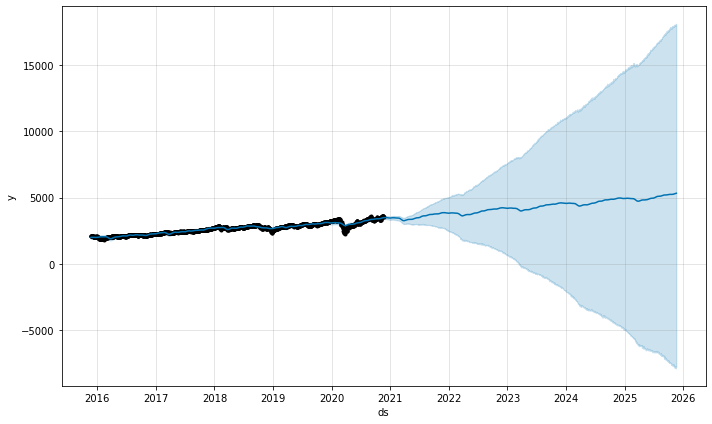

In [18]:
# plot forecast
fig1 = m.plot(forecast)

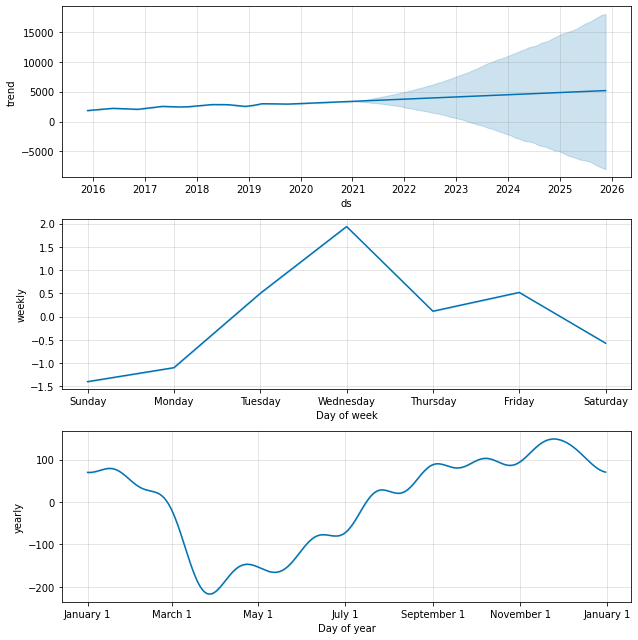

In [19]:
#we can also plot the trend and the weekly and yearly forecast
fig2 = m.plot_components(forecast)